##### Assignment 5 - Linear Regression

## Part 1 - Read your data frame.
The CSV file is "cars_base.csv".  This data came from Riverside and you can see the original data and the notebook I used to create the csv from the data.  Six of the instances are missing the horsepower feature.  Read in the data and fix the missing values with the average. (Same data set as before.  You can refer back to the previous assignment for the first few parts)

In [6]:
import pandas as pd

data = pd.read_csv("cars_base.csv")
hp_mean = data["horsepower"].mean()

#fillna
data.fillna( value=hp_mean, inplace=True)
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Part 2 - Display info
Take a look at the information.  You should not be missing any features.  Note any features that are objects, but could be numerical

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


### _Notes_
There are 398 entries for each of the features. They are all int or float types except for the car name. The origin could be an object but instead it looks like they are given a number according to a different country.

## Part 3 - Split the data frame

Use the train_test_split() function to split the data set into training(75%) and test(25%) sets. 

In [8]:
# Your code here
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.25, random_state=123)
print(len(train_set), len(test_set))

298 100


## Part 4 - Do some scatter plots
Our goal is to predict the mpg for a car.  Take a look at some of the features with respect to "mpg".  Make sure to look at "weight".

Use scatter_matrix.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='acceleration'>,
        <Axes: xlabel='acceleration', ylabel='acceleration'>,
        <Axes: xlabel='weight', ylabel='acceleration'>,
        <Axes: xlabel='horsepower', ylabel='acceleration'>],
       [<Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='acceleration', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='horsepower', ylabel='weight'>],
       [<Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='acceleration', ylabel='horsepower'>,
        <Axes: xlabel='weight', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', ylabel='horsepower'>]], dtype=object)

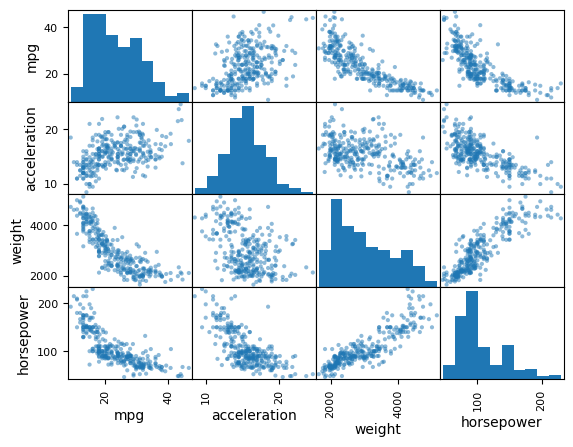

In [12]:
working_set = train_set.copy()

from pandas.plotting import scatter_matrix

compare = ['mpg', 'acceleration', 'weight', 'horsepower']
scatter_matrix(working_set[compare])

## Part 5 - Linear Regression
1. Pull out "weight" for the X and "mpg" for y. 
2. Fit the data.
3. Show R2 and Mean Square Error
4. Discuss the results

In [16]:
X = working_set[['weight']]
Y = working_set['mpg']
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X, Y)

#R2
print("The R2 score is ", reg.score(X,Y))

#Mean squared Error
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("The mean squared error is ", mse)

The R2 score is  0.6877005475735318
The mean squared error is  19.272882329800538


Discussion: 
These are not great numbers. We want the R2 score to be as close to 1 as we can get it and the mean squared error to be as close to 0 as it can be. We will need to add more features to try to create a closer relation.

## Part 6 - Add features to X
1. Pick up to 3 other features that you think might improve the model and use them for X.
2. Fit the data
3. Show the scores
4. Discuss the results

In [18]:
# Your code here
X = working_set[['weight', 'horsepower', 'acceleration', 'displacement']]
reg.fit(X,Y)

print("The R2 score is ", reg.score(X, Y))

y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("The mean squared error is ", mse)

The R2 score is  0.7021312710228864
The mean squared error is  18.382321578533173


Discussion: 
The numbers got very slightly better. Not as much as we want them to before having a good fit. The R2 score only increased by .02 and the mean squared error only decreased by .9 which is helpful but not as much as we want.

## Part 7 - Add a new feature to the Model
We have an inverse relation between the weight and the mpg and we notice that there is a factor of 100 difference in scales for these two features. Lets address the issue by creating a new feature based on the weight.  Call the feature weight-inv and compute it as 50000/weight.

1. Fit the data using weight-inv and mpg
1. Show the scores
1. Discuss the results

In [23]:
working_set['weight-inv'] = 50000/working_set['weight']
X = working_set[['weight-inv']]

reg.fit(X,Y)

print("The R2 score is ", reg.score(X,Y))

y_pred = reg.predict(X)
mse = mean_squared_error(Y, y_pred)
print("The mean squared error is ", mse)

The R2 score is  0.7003929733587473
The mean squared error is  18.48959684294629


Discussion:
This is slightly better than when it was just weight vs mpg but it has around the same numbers as when 3 other features were added in. It still isn't a great fit yet.

## Part 8 - Polynomial Features

1. Fit the data using weight and another feature of your choice with polynomial features of degree 2 or higher with a target of mpg
1. Show the scores
1. Discuss the results
1. Do you think the model is overfitting the training set?

In [39]:
X = working_set[['weight', 'horsepower']]
from sklearn.preprocessing import PolynomialFeatures
create_quad_terms = PolynomialFeatures(degree=3, include_bias=False)
x_quad_terms = create_quad_terms.fit_transform(X)

reg.fit(x_quad_terms, Y)

print("The R2 score is", reg.score(x_quad_terms, Y))

y_pred = reg.predict(x_quad_terms)
mse = mean_squared_error(Y, y_pred)
print("The mean squared error is ", mse)

The R2 score is 0.7598710167752444
The mean squared error is  14.819038591670392


Discussion:
There is a line where this would start overfitting the data. At 2 degrees I saw it did create better scores for the data. If you keep increasing the amount of degrees you are using it will keep getting better scores until you reach a degree of 6. I think after a few you aren't seeing to much of a change and you are starting to overfit the data and it will make you linear regression line go all over the place and not have a consistent shape to it. Just using a degree of 2 or 3 will get you a better score without overfitting the data.

## Part 9 - Polynomial Features + Regularization

1. Use ElasticNet
1. Fit the data using weight and another feature of your choice with polynomial features of degree 2 or higher with a target of mpg.
1. Try values of r from 0 to 1.  Try values of alpha ranging from 0 to 10. Remember your best score.
1. Show the scores
1. Discuss the results
1. Do you think the model is overfitting the training set?

In [69]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha = 1.0, l1_ratio=0.1)

X = working_set[['weight', 'horsepower']]
Y = working_set['mpg']
create_quad_terms = PolynomialFeatures(degree=3, include_bias=False)
x_quad_terms = create_quad_terms.fit_transform(X)

reg.fit(x_quad_terms, Y)

print("The R2 score is", reg.score(x_quad_terms, Y))

y_pred = reg.predict(x_quad_terms)
mse = mean_squared_error(Y, y_pred)
print("The mean squared error is ", mse)

The R2 score is 0.7446574704898474
The mean squared error is  15.757909553816784


C:\Users\s544086\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.363e+03, tolerance: 1.839e+00
  model = cd_fast.enet_coordinate_descent(


Discussion:
The regression does better when I have alpha closer to 0. The R2 score will get above 74 and stays there for most of the r values from 0 to 1. The scores also do better when the l1_ratio score is lower closer to 0. 

## Part 10 - Test Set time
Evaluate the model from part 9 for r2 and mean square error on the test set and discuss your results in comparison to part 9.

In [70]:
reg = ElasticNet(alpha = 1.0, l1_ratio=0.1)

X = test_set[['weight', 'horsepower']]
Y = test_set['mpg']
create_quad_terms = PolynomialFeatures(degree=3, include_bias=False)
x_quad_terms = create_quad_terms.fit_transform(X)

reg.fit(x_quad_terms, Y)

print("The R2 score is", reg.score(x_quad_terms, Y))

y_pred = reg.predict(x_quad_terms)
mse = mean_squared_error(Y, y_pred)
print("The mean squared error is ", mse)

The R2 score is 0.7560173695418352
The mean squared error is  14.27457855227532


C:\Users\s544086\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.143e+02, tolerance: 5.851e-01
  model = cd_fast.enet_coordinate_descent(


Discussion:
The test set did better than the training set. It has a better R2 score by about .02 and has a lower mean squared error by over 1. This could be because of an underfitting of the data or the test set data just had a slightly better correlation when done like the training set.

# Bonus options
For each of the options, redo your regression using the new features, report the results and discuss.


1. Look for a better set of features to predict mpg.
1. Create a new feature that is an interesting combination of two or more existing features and use the new feature in X.
2. Build a pipeline that includes polynomial features and standard scalar and evaluate the results.

In [ ]:
# your code here